In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [10]:
(x_train,y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

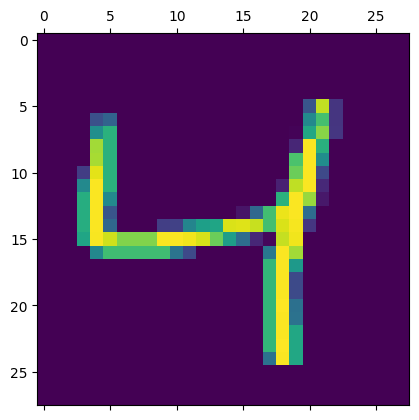

In [12]:
plt.matshow(x_train[2])

In [13]:
y_train[2]

4

In [14]:
x_train, x_test = x_train/255, x_test/255

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train, epochs= 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8263 - loss: 0.7019
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9382 - loss: 0.2164
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9553 - loss: 0.1585
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9663 - loss: 0.1189
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.0999


In [16]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1137


[0.10248956084251404, 0.9682999849319458]

In [17]:
y_pred=model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


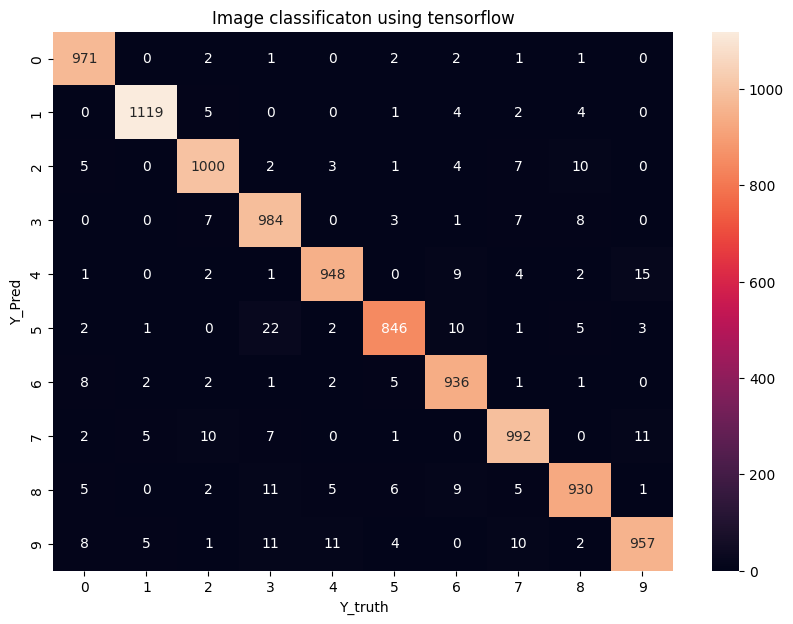

In [20]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt = 'd')
plt.title('Image classificaton using tensorflow')
plt.xlabel('Y_truth')
plt.ylabel('Y_Pred')
plt.show()